# Introduction to FermiLib 0.1

## $-1.7 \, a^\dagger_3 a_1$ and $(1 + 2i) \, a^\dagger_4 a^\dagger_2 a_3 a_0$ are FermionTerms

In [2]:
from fermion_operators import FermionTerm

n_q = 5
term_1 = -1.7 * FermionTerm(n_q, '3^ 1')
term_2 = (1. + 2.j) * FermionTerm(n_q, '4^ 2^ 3 0')

print term_1
print term_2

-1.7 [3^ 1]
(+1+2j) [4^ 2^ 3 0]


## FermionTerms support many built-in operators

In [2]:
print 2. * term_1
print term_1 / 2.

-3.4 [3^ 1]
(-0.85+0j) [3^ 1]


In [3]:
print term_1 == term_2
print term_1 != term_2

False
True


In [4]:
print abs(term_2)
print len(term_2)

+2.2360679775 [4^ 2^ 3 0]
4


In [5]:
print term_1 ** 2
print term_1 * term_2

+2.89 [3^ 1 3^ 1]
(-1.7-3.4j) [3^ 1 4^ 2^ 3 0]


In [6]:
for x in term_2:
    print x

(4, 1)
(2, 1)
(3, 0)
(0, 0)


In [7]:
print (4, 1) in term_2
print (1, 0) in term_2

True
False


In [8]:
print term_1
term_1 *= 3.
print term_1
term_1 /= 3.
print term_1

-1.7 [3^ 1]
(-5.1+0j) [3^ 1]
(-1.7+0j) [3^ 1]


## FermionOperators store the sum of FermionTerms

In [9]:
operator_1 = 8.2 * term_1 - 3.0 * term_2
operator_2 = term_2 ** 2 - operator_1
print operator_1
print operator_2

(-13.94+0j) [3^ 1]
(-3-6j) [4^ 2^ 3 0]

(+13.94+0j) [3^ 1]
(+3+6j) [4^ 2^ 3 0]
(-3+4j) [4^ 2^ 3 0 4^ 2^ 3 0]



In [10]:
print operator_1 - 2. * operator_2
print term_1 + operator_2 - term_2

(-41.82+0j) [3^ 1]
(-9-18j) [4^ 2^ 3 0]
(+6-8j) [4^ 2^ 3 0 4^ 2^ 3 0]

(+12.24+0j) [3^ 1]
(+2+4j) [4^ 2^ 3 0]
(-3+4j) [4^ 2^ 3 0 4^ 2^ 3 0]



In [11]:
print operator_1
operator_1 -= 1000. * term_1 * term_2
print operator_1

(-13.94+0j) [3^ 1]
(-3-6j) [4^ 2^ 3 0]

(+1700+3400j) [3^ 1 4^ 2^ 3 0]
(-13.94+0j) [3^ 1]
(-3-6j) [4^ 2^ 3 0]



In [12]:
operator_2 **= 2
print operator_2

(-41.82+55.76j) [3^ 1 4^ 2^ 3 0 4^ 2^ 3 0]
(-27+36j) [4^ 2^ 3 0 4^ 2^ 3 0]
(-7-24j) [4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0]
(-66-12j) [4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0]
(+41.82+83.64j) [3^ 1 4^ 2^ 3 0]
(+41.82+83.64j) [4^ 2^ 3 0 3^ 1]
(+194.3236+0j) [3^ 1 3^ 1]
(-41.82+55.76j) [4^ 2^ 3 0 4^ 2^ 3 0 3^ 1]



In [13]:
print term_1 in operator_1
print term_1 in operator_2

True
False


In [14]:
for term in operator_2:
    term *= 0.0001
print operator_2

(-0.004182+0.005576j) [3^ 1 4^ 2^ 3 0 4^ 2^ 3 0]
(-0.0027+0.0036j) [4^ 2^ 3 0 4^ 2^ 3 0]
(-0.0007-0.0024j) [4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0]
(-0.0066-0.0012j) [4^ 2^ 3 0 4^ 2^ 3 0 4^ 2^ 3 0]
(+0.004182+0.008364j) [3^ 1 4^ 2^ 3 0]
(+0.004182+0.008364j) [4^ 2^ 3 0 3^ 1]
(+0.01943236+0j) [3^ 1 3^ 1]
(-0.004182+0.005576j) [4^ 2^ 3 0 4^ 2^ 3 0 3^ 1]



In [15]:
print operator_2[term_1.operators]
print operator_1[term_1.operators]

0.0
(-13.94+0j)


## Of course, there are many custom methods

In [16]:
print term_1.commutator(term_2)
print term_1.commutator(term_1)

(-1.7-3.4j) [3^ 1 4^ 2^ 3 0]
(+1.7+3.4j) [4^ 2^ 3 0 3^ 1]

0


In [17]:
print term_2
print term_2.hermitian_conjugated()

(+1+2j) [4^ 2^ 3 0]
(+1-2j) [0^ 3^ 2 4]


In [18]:
term_3 = term_2 * term_2.hermitian_conjugated()
print term_3
print term_3.is_normal_ordered()
print term_3.normal_ordered()

(+5+0j) [4^ 2^ 3 0 0^ 3^ 2 4]
False
(+5+0j) [4^ 3^ 2^ 4 3 2]
(-5+0j) [4^ 2^ 4 2]
(+5+0j) [4^ 2^ 0^ 4 2 0]
(+5+0j) [4^ 3^ 2^ 0^ 4 3 2 0]



In [19]:
print term_1.is_molecular_term()
print term_2.is_molecular_term()

True
False


In [26]:
print operator_1.list_terms()
print operator_1.list_coefficients()

[(+1700+3400j) [3^ 1 4^ 2^ 3 0], (-13.94+0j) [3^ 1], (-3-6j) [4^ 2^ 3 0]]
[(1699.9999999999998+3399.9999999999995j), (-13.939999999999996+0j), (-3-6j)]


## We can map to QubitTerms and QubitOperators (and back)

In [27]:
print term_1.jordan_wigner_transform()
print term_1.bravyi_kitaev_transform()

-0.425j Y1 Z2 X3
(-0.425+0j) X1 Z2 X3
+0.425j X1 Z2 Y3
(-0.425+0j) Y1 Z2 Y3

(-0.425+0j) Z0 X1 Y2 Y3
-0.425j Z0 X1 Y2 X3
-0.425j Y1 Y2 Y3
(+0.425+0j) Y1 Y2 X3



In [29]:
qubit_op_1 = term_1.jordan_wigner_transform()
qubit_op_2 = operator_1.jordan_wigner_transform()
print qubit_op_1
print qubit_op_2

-0.425j Y1 Z2 X3
(-0.425+0j) X1 Z2 X3
+0.425j X1 Z2 Y3
(-0.425+0j) Y1 Z2 Y3

-3.485j Y1 Z2 X3
(-3.485+0j) X1 Z2 X3
(-106.25+53.125j) Y0 X1 Y2 Y4
(-106.25+53.125j) Y0 Y1 X2 Z3 Y4
(-106.25+53.125j) X0 Y1 Y2 Y4
(+53.125+106.25j) Y0 Y1 Y2 Z3 Y4
(+106.25-53.125j) X0 Y1 Y2 Z3 Y4
(+0.1875+0.375j) Y0 Z1 Y2 Y3 Y4
(+0.375-0.1875j) Y0 Z1 Y2 X3 Y4
(+106.25-53.125j) Y0 Y1 Y2 X4
(+0.1875+0.375j) X0 Z1 X2 Y3 Y4
(-53.125-106.25j) X0 Y1 X2 Y4
(+0.1875+0.375j) Y0 Z1 X2 X3 Y4
(-0.375+0.1875j) X0 Z1 X2 Y3 X4
(-53.125-106.25j) Y0 Y1 Y2 Y4
(+53.125+106.25j) Y0 X1 X2 Z3 Y4
(-106.25+53.125j) Y0 X1 X2 Z3 X4
(+53.125+106.25j) X0 Y1 Y2 Z3 X4
(-106.25+53.125j) X0 X1 Y2 X4
(-53.125-106.25j) Y0 X1 X2 Y4
(+106.25-53.125j) Y0 X1 X2 X4
(-53.125-106.25j) X0 X1 X2 X4
(-53.125-106.25j) X0 X1 Y2 Z3 Y4
(+0.375-0.1875j) X0 Z1 Y2 Y3 Y4
(+53.125+106.25j) Y0 Y1 X2 X4
(+106.25-53.125j) X0 X1 Y2 Z3 X4
(+53.125+106.25j) X0 X1 X2 Z3 X4
(-53.125-106.25j) Y0 X1 Y2 X4
(+106.25-53.125j) X0 X1 X2 Z3 Y4
(+0.375-0.1875j) X0 Z1 Y2 X3 X4
(

In [31]:
for x in qubit_op_1:
    print x
    print x.reverse_jordan_wigner()

-0.425j Y1 Z2 X3
(-0.425-0j) [3^ 1]
(-0.425-0j) [3 1^]
(-0.425-0j) [3 1]
(-0.425-0j) [3^ 1^]

(-0.425+0j) X1 Z2 X3
(-0.425+0j) [3^ 1]
(+0.425-0j) [3 1^]
(-0.425+0j) [3 1]
(+0.425-0j) [3^ 1^]

+0.425j X1 Z2 Y3
(-0.425+0j) [3^ 1]
(-0.425+0j) [3 1^]
(+0.425+0j) [3 1]
(+0.425+0j) [3^ 1^]

(-0.425+0j) Y1 Z2 Y3
(-0.425+0j) [3^ 1]
(+0.425-0j) [3 1^]
(+0.425-0j) [3 1]
(-0.425+0j) [3^ 1^]



In [32]:
qubit_op_2 -= 2. * qubit_op_1 ** 2
print qubit_op_2

-3.485j Y1 Z2 X3
(-3.485+0j) X1 Z2 X3
(-106.25+53.125j) Y0 X1 Y2 Y4
(-106.25+53.125j) Y0 Y1 X2 Z3 Y4
(-106.25+53.125j) X0 Y1 Y2 Y4
(+53.125+106.25j) Y0 Y1 Y2 Z3 Y4
(+106.25-53.125j) X0 Y1 Y2 Z3 Y4
(+0.1875+0.375j) Y0 Z1 Y2 Y3 Y4
(+0.375-0.1875j) Y0 Z1 Y2 X3 Y4
(+106.25-53.125j) Y0 Y1 Y2 X4
(+0.1875+0.375j) X0 Z1 X2 Y3 Y4
(-53.125-106.25j) X0 Y1 X2 Y4
(+0.1875+0.375j) Y0 Z1 X2 X3 Y4
(-0.375+0.1875j) X0 Z1 X2 Y3 X4
(-53.125-106.25j) Y0 Y1 Y2 Y4
(+53.125+106.25j) Y0 X1 X2 Z3 Y4
(-106.25+53.125j) Y0 X1 X2 Z3 X4
(+53.125+106.25j) X0 Y1 Y2 Z3 X4
(-106.25+53.125j) X0 X1 Y2 X4
(-53.125-106.25j) Y0 X1 X2 Y4
(+106.25-53.125j) Y0 X1 X2 X4
(-53.125-106.25j) X0 X1 X2 X4
(-53.125-106.25j) X0 X1 Y2 Z3 Y4
(+0.375-0.1875j) X0 Z1 Y2 Y3 Y4
(+53.125+106.25j) Y0 Y1 X2 X4
(+106.25-53.125j) X0 X1 Y2 Z3 X4
(+53.125+106.25j) X0 X1 X2 Z3 X4
(-53.125-106.25j) Y0 X1 Y2 X4
(+106.25-53.125j) X0 X1 X2 Z3 Y4
(+0.375-0.1875j) X0 Z1 Y2 X3 X4
(-106.25+53.125j) X0 Y1 X2 Z3 X4
(+53.125+106.25j) X0 X1 Y2 Y4
(-3.485+0j) Y1 

## QubitTerms and QubitOperators can map to SparseOperators

In [33]:
sparse_op_1 = qubit_op_1.get_sparse_operator()
print sparse_op_1

  (2, 8)	(-1.7+0j)
  (3, 9)	(-1.7+0j)
  (6, 12)	(1.7+0j)
  (7, 13)	(1.7+0j)
  (18, 24)	(-1.7+0j)
  (19, 25)	(-1.7+0j)
  (22, 28)	(1.7+0j)
  (23, 29)	(1.7+0j)


In [34]:
sparse_op_1 *= 2.
print sparse_op_1

  (2, 8)	(-3.4+0j)
  (3, 9)	(-3.4+0j)
  (6, 12)	(3.4+0j)
  (7, 13)	(3.4+0j)
  (18, 24)	(-3.4+0j)
  (19, 25)	(-3.4+0j)
  (22, 28)	(3.4+0j)
  (23, 29)	(3.4+0j)


In [35]:
fermion_operator = term_1 + term_1.hermitian_conjugated()
print fermion_operator
qubit_term = fermion_operator.jordan_wigner_transform()
print qubit_term
sparse_operator = qubit_term.get_sparse_operator()
print sparse_operator.eigenspectrum()

(-1.7+0j) [3^ 1]
(-1.7+0j) [1^ 3]

(-0.85+0j) X1 Z2 X3
(-0.85+0j) Y1 Z2 Y3

[-1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7  0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.7  1.7  1.7  1.7  1.7  1.7
  1.7  1.7]


In [36]:
print sparse_operator.is_hermitian()
ground_state_energy, ground_state = sparse_operator.get_ground_state()
print ground_state_energy
print sparse_operator.expectation(ground_state)

True
-1.7
(-1.7-7.8062556419e-18j)


## Lattice models

In [40]:
from hubbard import fermi_hubbard
x_dimension = 2
y_dimension = 2
tunneling = 2.
coulomb = 1.
magnetic_field = 0.5
chemical_potential = 0.25
periodic = 1
spinless = 1

hubbard_model = fermi_hubbard(
    x_dimension, y_dimension, tunneling, coulomb,
    chemical_potential, magnetic_field, periodic, spinless)
print hubbard_model

+0.25 [2^ 2]
+1.0 [2^ 2 3^ 3]
-2.0 [0^ 1]
-2.0 [1^ 3]
+0.25 [3^ 3]
+1.0 [0^ 0 1^ 1]
-2.0 [2^ 3]
-2.0 [0^ 2]
-2.0 [3^ 1]
-2.0 [3^ 2]
-2.0 [1^ 0]
-2.0 [2^ 0]
-0.25 [0^ 0]
+1.0 [0^ 0 2^ 2]
-0.25 [1^ 1]
+1.0 [1^ 1 3^ 3]



In [41]:
jw_hamiltonian = hubbard_model.jordan_wigner_transform()
bk_hamiltonian = hubbard_model.bravyi_kitaev_transform()
print jw_hamiltonian
print bk_hamiltonian

(-1+0j) X1 Z2 X3
(-0.625+0j) Z2
(+0.25+0j) Z0 Z1
(-1+0j) X2 X3
(-0.375+0j) Z0
(+0.25+0j) Z1 Z3
(-0.375+0j) Z1
(-1+0j) X0 Z1 X2
(-1+0j) Y0 Z1 Y2
(+0.25+0j) Z0 Z2
(+0.25+0j) Z2 Z3
(-0.625+0j) Z3
(-1+0j) Y2 Y3
(-1+0j) Y1 Z2 Y3
(-1+0j) Y0 Y1
(+1+0j) I
(-1+0j) X0 X1

(-0.625+0j) Z2
(-0.375+0j) Z0 Z1
(-1+0j) X1 Z2
(+1+0j) Z0 X1 Z3
(-0.375+0j) Z0
(+0.25+0j) Z1 Z3
(+0.25+0j) Z1
(+1+0j) Y0 Y1 X2
(-1+0j) X0 Y1 Y2
(+0.25+0j) Z0 Z2
(+1+0j) Z1 X2 Z3
(-1+0j) X0
(-1+0j) X2
(+1+0j) X0 Z1
(-0.625+0j) Z1 Z2 Z3
(+1+0j) I
(+0.25+0j) Z0 Z2 Z3



In [42]:
jw_sparse = jw_hamiltonian.get_sparse_operator()
bk_sparse = bk_hamiltonian.get_sparse_operator()
print jw_sparse.eigenspectrum() - bk_sparse.eigenspectrum()

[  0.00000000e+00   1.33226763e-15  -4.44089210e-16  -7.10542736e-15
   1.73472348e-18   0.00000000e+00  -1.21430643e-17   1.99840144e-15
   4.44089210e-16   1.99840144e-15   3.99680289e-15  -8.88178420e-16
   0.00000000e+00   1.77635684e-15  -4.44089210e-15   0.00000000e+00]


## Jellium

In [30]:
from jellium import jellium_model

n_dimensions = 1
grid_length = 5
length_scale = 3.
spinless = 1

momentum_jellium = jellium_model(n_dimensions, grid_length, length_scale,
                                 spinless, momentum_space=True)
print momentum_jellium

ImportError: No module named jellium

In [31]:
momentum_qubit = momentum_jellium.jordan_wigner_transform()
print momentum_qubit

NameError: name 'momentum_jellium' is not defined

In [ ]:
position_jellium = jellium_model(n_dimensions, grid_length, length_scale,
                                 spinless, momentum_space=False)
position_qubit = position_jellium.jordan_wigner_transform()
print position_jellium
print position_qubit

In [ ]:
momentum_sparse = momentum_qubit.get_sparse_operator()
position_sparse = position_qubit.get_sparse_operator()
print momentum_sparse.eigenspectrum() - position_sparse.eigenspectrum()

In [ ]:
n_dimensions = 1
length_scale = 2.
spinless = 1

for grid_length in range(3, 17):
    
    if not grid_length % 2:
        continue
    
    momentum_jellium = jellium_model(n_dimensions, grid_length, length_scale,
                                     spinless, momentum_space=True)
    momentum_qubit = momentum_jellium.jordan_wigner_transform()
    
    position_jellium = jellium_model(n_dimensions, grid_length, length_scale,
                                     spinless, momentum_space=False)
    position_qubit = position_jellium.jordan_wigner_transform()
    
    print 'At {} qubits...'.format(momentum_qubit.n_qubits)
    print 'Momentum space Hamiltonian has {} terms.'.format(len(momentum_qubit))
    print 'Position space Hamiltonian has {} terms.\n'.format(len(position_qubit))

## MolecularData class stores data about molecules

In [32]:
from molecular_data import MolecularData

diatomic_bond_length = 8.
geometry = [('Na', (0., 0., 0.)),
            ('Cl', (0., 0., diatomic_bond_length))]
basis = '6-31g'
multiplicity = 1
charge = 0
description = str(diatomic_bond_length)

molecule = MolecularData(
    geometry, basis, multiplicity, charge, description)

In [33]:
print molecule.name
print molecule.n_atoms
print molecule.atoms
print molecule.protons

Na1-Cl1_6-31g_singlet_8.0
2
['Na', 'Cl']
[11, 17]


In [34]:
from chemical_series import make_atom

atomic_symbols = ['C', 'Na', 'Ca', 'Te', 'Cu', 'Fe', 'Ag']

for symbol in atomic_symbols:
    atom = make_atom(symbol, basis)
    print symbol, atom.multiplicity

C 3
Na 2
Ca 1
Te 3
Cu 2
Fe 5
Ag 2


## Running Psi4 to populate MolecularData class

In [35]:
from run_psi4 import run_psi4

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length = 0.7414
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_fci = 1

# Perform calculation.
molecule = MolecularData(
        geometry, basis, multiplicity)
molecule = run_psi4(
    molecule, run_scf=run_scf, run_mp2=run_mp2, run_fci=run_fci)

print 'Hartree-Fock energy', molecule.hf_energy
print 'MP2 energy', molecule.mp2_energy
print 'FCI energy', molecule.fci_energy
print 'Nuclear repulsion energy', molecule.nuclear_repulsion

Hartree-Fock energy -1.11668438691
MP2 energy -1.12985341263
FCI energy -1.13727017463
Nuclear repulsion energy 0.713753990545


In [36]:
bond_lengths = []
hf_energies = []
fci_energies = []
for point in range(2, 20):
    
    bond_length = 0.1 * float(point)
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    bond_lengths += [bond_length]
    
    molecule = MolecularData(
        geometry, basis, multiplicity, description=str(bond_length))
    molecule = run_psi4(molecule, run_scf=run_scf, run_fci=run_fci)

    print 'Bond length in Bohr', bond_length
    print 'Hartree-Fock energy', molecule.hf_energy
    print 'FCI energy', molecule.fci_energy
    fci_energies += [molecule.fci_energy]
    hf_energies += [molecule.hf_energy]

Bond length in Bohr 0.2
Hartree-Fock energy 0.164175001415
FCI energy 0.157482124142
Bond length in Bohr 0.3
Hartree-Fock energy -0.593827764585
FCI energy -0.601803716835
Bond length in Bohr 0.4
Hartree-Fock energy -0.904361397714
FCI energy -0.914149708214
Bond length in Bohr 0.5
Hartree-Fock energy -1.04299627651
FCI energy -1.0551597965
Bond length in Bohr 0.6
Hartree-Fock energy -1.10112824314
FCI energy -1.11628600783
Bond length in Bohr 0.7
Hartree-Fock energy -1.11734903507
FCI energy -1.13618945427
Bond length in Bohr 0.8
Hartree-Fock energy -1.11085039699
FCI energy -1.13414766636
Bond length in Bohr 0.9
Hartree-Fock energy -1.09191404011
FCI energy -1.12056028062
Bond length in Bohr 1.0
Hartree-Fock energy -1.06610864808
FCI energy -1.1011503293
Bond length in Bohr 1.1
Hartree-Fock energy -1.03653887354
FCI energy -1.07919294388
Bond length in Bohr 1.2
Hartree-Fock energy -1.00510670488
FCI energy -1.05674074513
Bond length in Bohr 1.3
Hartree-Fock energy -0.973110613949
FCI

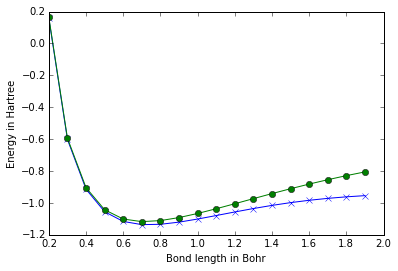

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in Bohr')
plt.show()

## $\sum_{pq} h_{pq}\, a^\dagger_p a_q + \frac{1}{2} \sum_{pqrs} h_{pqrs} \, a^\dagger_p a^\dagger_q a_r a_s$ is a MolecularOperator

In [38]:
# Set molecule parameters.
diatomic_bond_length = 4.
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., diatomic_bond_length))]
basis = 'sto-3g'
multiplicity = 1
description = str(diatomic_bond_length)

# Set Hamiltonian parameters.
active_space_start = 1
active_space_stop = 3

# Generate and populate instance of MolecularData using Psi4.
molecule = MolecularData(geometry, basis, multiplicity,
                         description=description)
molecule = run_psi4(molecule, run_scf=True)

# Get the Hamiltonian in an active space.
molecular_hamiltonian = molecule.get_molecular_hamiltonian(
    active_space_start, active_space_stop)

print molecular_hamiltonian

[] -7.00307139836

[0 0] -0.49176143122
[0 2] 0.127933719693
[1 1] -0.49176143122
[1 3] 0.127933719693
[2 0] 0.127933719693
[2 2] -0.389242464849
[3 1] 0.127933719693
[3 3] -0.389242464849

[0 1 1 0] 0.180809315862
[0 1 1 2] -0.0639668602239
[0 1 3 0] -0.0639668602239
[0 1 3 2] 0.0771665402713
[0 2 0 2] 0.0771665402713
[0 2 2 0] 0.144507326259
[0 3 1 0] -0.0639668602239
[0 3 1 2] 0.0771665402713
[0 3 3 0] 0.144507326259
[0 3 3 2] -0.0254096944453
[1 0 0 1] 0.180809315862
[1 0 0 3] -0.0639668602239
[1 0 2 1] -0.0639668602239
[1 0 2 3] 0.0771665402713
[1 2 0 1] -0.0639668602239
[1 2 0 3] 0.0771665402713
[1 2 2 1] 0.144507326259
[1 2 2 3] -0.0254096944453
[1 3 1 3] 0.0771665402713
[1 3 3 1] 0.144507326259
[2 0 0 2] 0.144507326259
[2 0 2 0] 0.0771665402713
[2 1 1 0] -0.0639668602239
[2 1 1 2] 0.144507326259
[2 1 3 0] 0.0771665402713
[2 1 3 2] -0.0254096944453
[2 3 1 0] 0.0771665402713
[2 3 1 2] -0.0254096944453
[2 3 3 0] -0.0254096944453
[2 3 3 2] 0.139201865456
[3 0 0 1] -0.0639668602239


In [39]:
fermion_hamiltonian = molecular_hamiltonian.get_fermion_operator()
qubit_hamiltonian = fermion_hamiltonian.bravyi_kitaev_transform()
print qubit_hamiltonian

(+0.0190962435726+0j) Z2
(+0.0385832701357+0j) Y0 Z1 Y2 Z3
(+0.0495520015552+0j) Z0 Z1
(-0.0127048472226+0j) Y0 X1 Y2 Z3
(+0.031983430112+0j) Y0 X1 Y2
(+0.0385832701357+0j) X0 Z1 X2 Z3
(+0.0192785825117+0j) X1 Z2
(+0.069600932728+0j) Z1 Z3
(+0.031983430112+0j) Z0 X1 Z2
(-0.0127048472226+0j) Z0 X1 Z2 Z3
(+0.031983430112+0j) X0 X1 X2
(-0.0192785825117+0j) Z0 X1 Z3
(+0.0495520015552+0j) Z0
(+0.0722536631297+0j) Z0 Z1 Z2
(+0.0722536631297+0j) Z0 Z1 Z2 Z3
(+0.0904046579309+0j) Z1
(+0.0385832701357+0j) X0 Z1 X2
(+0.0385832701357+0j) Y0 Z1 Y2
(-0.0127048472226+0j) X0 X1 X2 Z3
(+0.033670392994+0j) Z0 Z2
(+0.0192785825117+0j) X0 Y1 Y2
(-0.0192785825117+0j) Y0 Y1 X2
(+0.0127048472226+0j) X1
(+0.0190962435726+0j) Z1 Z2 Z3
(-7.51222159152+0j) I
(+0.033670392994+0j) Z0 Z2 Z3
(-0.031983430112+0j) X1 Z3



In [40]:
import scipy
import numpy

n_orbitals = molecular_hamiltonian.n_qubits // 2
n_variables = n_orbitals * (n_orbitals - 1) / 2
random_angles = numpy.pi * (1. - 2. * numpy.random.rand(n_variables))
kappa = numpy.zeros((n_orbitals, n_orbitals))

index = 0
for p in range(n_orbitals):
    for q in range(p + 1, n_orbitals):
        kappa[p, q] = random_angles[index]
        kappa[q, p] = -numpy.conjugate(random_angles[index])
        index += 1

rotation_matrix = scipy.linalg.expm(kappa)

In [42]:
qubit_hamiltonian_1 = molecular_hamiltonian.jordan_wigner_transform()
sparse_hamiltonian_1 = molecular_hamiltonian.get_sparse_operator()
energy_1, state_1 = sparse_hamiltonian_1.get_ground_state()

molecular_hamiltonian.rotate_basis(rotation_matrix)

qubit_hamiltonian_2 = molecular_hamiltonian.jordan_wigner_transform()
sparse_hamiltonian_2 = qubit_hamiltonian.get_sparse_operator()
energy_2, state_2 = sparse_hamiltonian_2.get_ground_state()

print qubit_hamiltonian_1 - qubit_hamiltonian_2
print energy_1 - energy_2

(+0.0294722524088+0j) X1 Z2 X3
(+0.032217623658+0j) Z0 X1 Z2 X3
(+0.00712477490627+0j) Z2
(+0.032217623658+0j) X0 X2
(+0.032217623658+0j) Z0 Y1 Z2 Y3
(-0.0726772534367+0j) Z0 Z1
(+0.0119206995377+0j) Y1 Y3
(+0.0119206995377+0j) X0 Z1 X2 Z3
(-0.0371995080717+0j) X0 X1 Y2 Y3
(-0.00712477490627+0j) Z0
(-0.00712477490627+0j) Z1
(+0.0294722524088+0j) X0 Z1 X2
(+0.0119206995377+0j) Y0 Z1 Y2 Z3
(+0.0294722524088+0j) Y0 Z1 Y2
(-0.00172176270667+0j) Z2 Z3
(+0.0371995080717+0j) Y0 X1 X2 Y3
(+0.00712477490627+0j) Z3
(+0.0371995080717+0j) Z1 Z2
(+0.0294722524088+0j) Y1 Z2 Y3
(+0.032217623658+0j) Y0 Y2
(+0.0371995080717+0j) Z0 Z3
(-0.0371995080717+0j) Y0 Y1 X2 X3
(+0.0371995080717+0j) X0 Y1 Y2 X3
(+0.0119206995377+0j) X1 X3

3.5527136788e-15
